# 3. Gyakorlat - 1 DoF lengő kar
2021.02.22

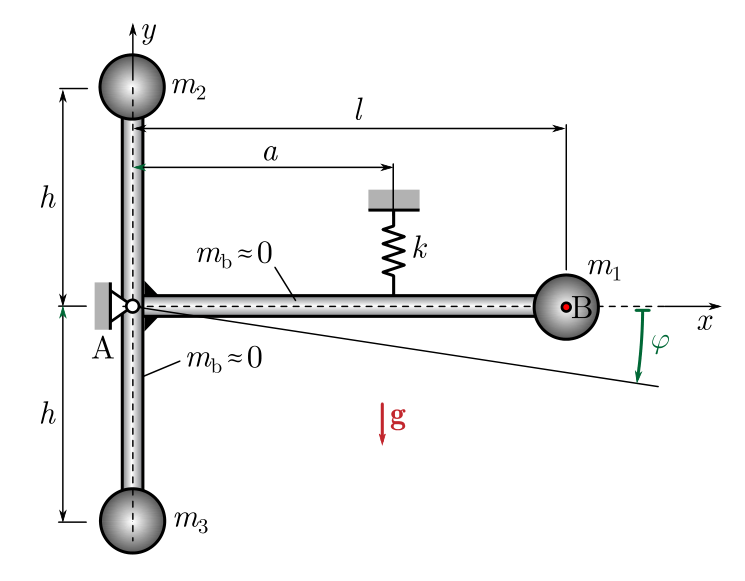

In [1]:
from IPython.display import Image
Image(filename='1.png',width=500)

## Feladat:

A mellékelt ábrán egy lengőkar látható, ami két elhanyagolható tömegű rúdból és a hozzá csatlakozó három tömegpontból ($m_1, m_2, m_3$) áll. A lengőkar csak az $A$ pont körül tud elfordulni. A mozgást leíró általános koordináta a $\varphi$ szög, melyet a vízszintes egyenestől mérünk. A lengőkar a Föld gravitációs terében van. 
A $\varphi=0$ helyzetben az egyensúlyt a $k$ merevségű rugó biztosítja.

### Adatok:
|||
|------------------|------------------|
| $m_1$ = 2 kg     | $l$ = 1 m        |
| $m_2$ = 4 kg     | $h$ = 0,5 m      |
| $m_3$ = 3 kg     | $a$ = 0,6 m      |
| $k$ = 10$^4$ N/m   | $g$ = 9,81 m/$s^2$ |

### Részfeladatok:
1. Írja fel a mozgásegyenletet az egyensúlyi pont körül végzett kis amplitúdójú rezgést feltételezve.
2. Számítsa ki a sajátkörfrekvenciát, a sajátfrekvenciát és a periódusidőt!
3. Határozza meg a mozgástörvényt, ha a kezdeti feltételek a függőleges pozícióra $y_{\text{B}}(t=0)=-0,01$ m, és a sebességre $v_{\text{B},y}(t=0)=-1$ m/s a $B$ pontban!
4. Számítsa ki a rugóerő maximális értékét a megadott kezdeti feltételek esetén!

## Megoldás
### Szabadtest ábra

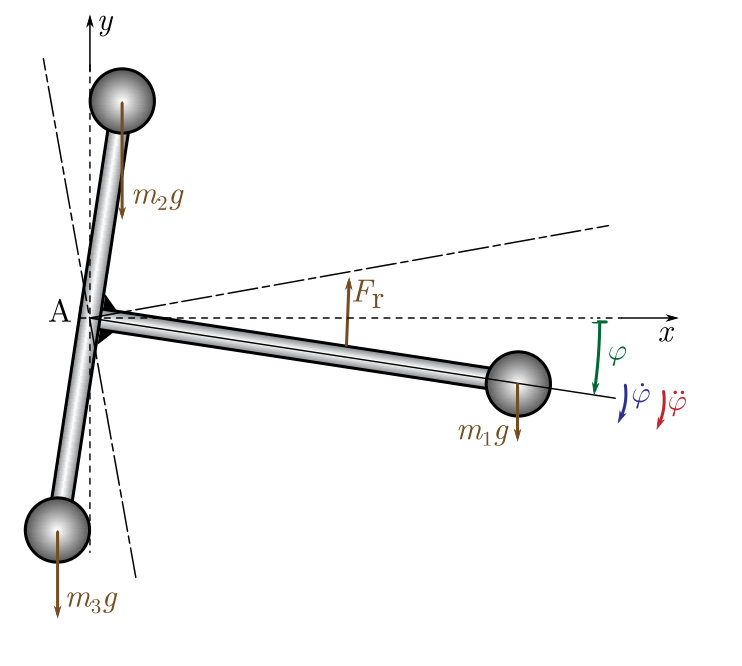

In [2]:
Image(filename='2.png',width=500)

### 1. Feladat
A szabadtest ábra alapján a mozgásegyenlet könnyen meghatározható a dinamika alaptörvényének segítségével

\begin{equation}
    \dot{\Pi}_{\text{Az}}=M_{\text{Az}}.
\end{equation}
Behelyettesítés után kapjuk:

\begin{equation}
    -\Theta_{\text{A}}\ddot{\varphi}=-m_1gl\cos\varphi-m_2gh\sin\varphi-m_3gh\sin\varphi+M_{\text{r}}(\varphi),
\end{equation}

ahol $M_{\text{r}}(\varphi)$ a rugerőhöz tartozó nyomatékot jelöli. A kis amplitúdók miatt a fenti egyenlet linearizálható az egyensúlyi pont körül $\cos\varphi\approx 1$ és a $\sin\varphi\approx \varphi$ közelítéseket alkalmazva. FONTOS: A nyomatékot leíró kifejezés nem lineáris, viszont kis rezgésamplitúdók esetén az alábbi kifejezéssel jól közelíthető

\begin{equation}
    F_{\text{r}}(\varphi)\approx F_{\text{r,st}}+ka\varphi,
\end{equation}

ahol $F_{\text{r,st}}$ az egynsúlyi helyzetben fellépő statikus rugóerő, a kifejezésben szereplő második tag pedig a rezgések által keltett úgynevezett dinamikus erő $F_{\text{r,dyn}}\approx ka\varphi$. A rugóerőhoz tartozó nyomaték linearizált alakja tehát a következő alakban adható meg:

\begin{equation}
    M_{\text{r}}(\varphi)\approx M_{\text{r,st}}+ka^2\varphi,
\end{equation}

ahol $M_{\text{r,st}}=F_{\text{r,st}}a$ a statikus rugóerő nyomatéka. Könnyen beltható, hogy a statikus rugóerőből származó nyomaték és a gravitációs erő nyomatéka pont kiejtik egymást, így ez a két tag elhagyható a mozgásegyenletből:
\begin{equation}
    M_{\text{r,st}}=m_1gl.
\end{equation}

In [3]:
import sympy as sp
sp.init_printing()
from IPython.display import display

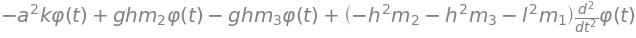

In [4]:
## A mozgásegyenlet linearizált alakja:

# szimbólumok definiálása
g,l,h, m1, m2, m3, k, a, t = sp.symbols("g,l,h, m1, m2, m3, k, a, t", real=True) # feltételezzük, hogy valósak

# Célszerű először a tehetetlenségi nyomatékot is kifejezni megadott adatok segítségével:

Θ_Az = m2*h**2+m3*h**2+m1*l**2

# Az általános koordináta definiálása az idő függvényeként
t = sp.symbols("t",real=True, positive=True)
φ_t = sp.Function('φ')(t)

# A z tengelyre számított perdület derivált az A pontban
dΠ_Az = -Θ_Az*φ_t.diff(t,2)

# A z tengelyre számított nyomaték az A pontban
M_Az = -m2*g*h*φ_t+m3*g*h*φ_t+k*a**2*φ_t

# A dinamika alapegyenlete
# (nullára rendezve)

din = dΠ_Az-M_Az
din

In [5]:
# Ahhoz, hogy a mozgásegyenletet a megszokott alakra
# rendezzük, ki kell fejezni a φ(t) együtthatóit.
# Az együtthatókat a coeff() függvény segítségével
# tudjuk kinyerni az adott kifejezésből.

co1=din.coeff(φ_t)
co2=din.coeff(φ_t.diff(t,2))
display(co1,co2)

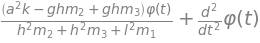

In [6]:
# Leosztva az egyenletet a második derivált együtthatójával,
# a megszokott alakora jutunk.

# Itt a sympy apart() függvényét használjuk,
# hogy a kifejezésben különszedjük a φ(t) és annak deriváltjait tartalmazó tagokat.
# (Ez nem kötelező lépés, csak áttekinthetőbb így.)

mozg_egy=sp.apart(din/co2,φ_t) # sp.apart() -> melyik kifejezésből, melyik változót 
mozg_egy

### 2. Feladat

A mozgásegyenletben $\varphi (t)$ együtthatója egyenlő a sajátkörfrekvencia négyzetével ($\omega_n^2$).

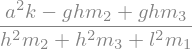

In [7]:
# A sajátkörfrekvencia négyzetét érdemes kimenteni egy változóba.
om2=mozg_egy.coeff(φ_t)
om2

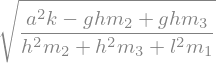

In [8]:
# gyökvonással adódik a sajátfrekvencia
ω_n=sp.sqrt(om2)
ω_n

In [9]:
# Az adatoknak érdemes létrehozni egy behelyettesítési listát,
# amit a numerikus értékek meghatározásánál használhatunk.
adatok=[(m1,2),(m2,4),(m3,3),(k,10**4),(l,1),(h,0.5),(a,0.6),(g,9.81)]

# sajátkörfrekvencia numerikusan [rad/s]
ω_n_num=ω_n.subs(adatok)
ω_n_num.evalf(5)

In [10]:
# sajátfrekvencia numerikusan [Hz]
f_n_num=ω_n_num/(2*sp.pi).evalf() 
f_n_num.evalf(5)

In [11]:
# lengésidő numerikusan [s]
T_n_num=((2*sp.pi)/ω_n_num).evalf()
T_n_num.evalf(4)

### 3. Feladat

In [12]:
# Kezdeti értékek definiálása.

yB_0=-0.01
vBy_0=-1

# A kezdeti értékeket az általános koordinátával,
# illetve annak deriváltjával kell megadni a differenciálegyenlet megoldásáshoz.

kezdeti_ert = {φ_t.subs(t,0): -yB_0/l.subs(adatok), φ_t.diff(t).subs(t,0): -vBy_0/l.subs(adatok)} 
kezdeti_ert

⎧            ⎛d       ⎞│      ⎫
⎨φ(0): 0.01, ⎜──(φ(t))⎟│   : 1⎬
⎩            ⎝dt      ⎠│t=0   ⎭

In [13]:
# Sympy-ban a kezdetiértékkel megadott differenciálegyenlet
# könnyen megoldható a dsolve() függvény segítségével.
φ_t_megold = sp.dsolve(mozg_egy.expand().subs(adatok),φ_t,ics=kezdeti_ert)
φ_t_megold

### 4: Feladat
A rugóerő a statikus és dinamikus rugóerő komponenesek segítségével felírható:

\begin{equation}
F_r(t)=F_{r,st}+ka\varphi(t).
\end{equation}

In [14]:
# A statikus rugóerő a gravitációs erővel egyensúlyt tartó erő:
Fr_st=m1*g*l/a

# stat+din rugóerő
Fr_t=Fr_st+k*a*φ_t

# A maximális rugóerő ott lesz ahol a φ(t) függvénynek is maximam van
φ_max=sp.symbols("φ_max")
Fr_max=Fr_st+k*a*φ_max
Fr_max

A $\varphi(t)$ függvény maximuma könnyen meghatározható, ha a mozgásegyenlet megoldásást a következő alakra hozzuk:

\begin{equation}
    \varphi(t)=\Phi\cos(\omega_nt+\delta).
\end{equation}

Ekkor a $\Phi$ adja meg a rezgés amplitudóját, ami a maximális $\varphi$ értékkel egyenlő. Kihasználva a trigonometrikus azonosságot:

\begin{equation}
\Phi\cos(\omega_nt+\delta)=\Phi\cos(\omega_nt)\cos(\delta)-\Phi\sin(\omega_nt)\sin(\delta),
\end{equation}

majd összehasonlítva az együtthatókat a 3. feladatban a megoldásban szereplő együtthatókkal adódik

\begin{equation}
    \cos(\omega_nt):\hspace{50pt}C_1=\Phi\cos\delta,
\end{equation}
\begin{equation}
    \sin(\omega_nt):\hspace{50pt}C_2=\Phi\sin\delta.
\end{equation}

Innét az amplitúdó, illetve a $\delta$:

\begin{equation}
    \Phi=\sqrt{C_1^2+C_2^2},
\end{equation}

\begin{equation}
    \delta=-\arctan\left(\frac{C_2}{C_1}\right).
\end{equation}

In [15]:
# A fentiek kiszámításához vesszük a mozgásegyenlet megoldását:
φ_t_megold

In [16]:
# majd a jobb oldalára alkalmazzuk a `.as_coefficients_dict()` metódust.
dict_coeff = φ_t_megold.rhs.as_coefficients_dict()
dict_coeff

# Látható, hogy így az együtthatók és a kifejezések egy `dictionary`-ben
# kerültek tárolásra.

In [17]:
# Szedjük ki a sin() és cos() együtthatóit ebből a `dictionary`-ből. Pontosabban a 
# `dictionary` értkékeket tartalmazó listájából.
display(dict_coeff.values())

C1=list(dict_coeff.values())[0]
C2=list(dict_coeff.values())[1]

dict_values([0.0322968709613617, 0.0100000000000000])

In [18]:
Φ=sp.sqrt(C1**2+C2**2)
δ=sp.atan(C1/C2)

In [19]:
# A fáziseltolás: [rad]
δ.evalf(5)

In [20]:
# Az amplitúdó: [m]
Φ.evalf(5)

In [21]:
# Ebben az esetben a maximális rugóerő: [N]
Fr_max.subs(adatok).subs(φ_max,Φ).evalf(5)

Készítette: 

            Juhos-Kiss Álmos (Alkalmazott Mechanika Szakosztály) 
            Takács Dénes (BME MM) kidolgozása és ábrái alapján.

            Hibák, javaslatok:
            amsz.bme@gmail.com
            csuzdi02@gmail.com
            almosjuhoskiss@gmail.com

            2021.02.22
        